# Recommender Systems with Python

### Content-based recommender system
#### MovieLens dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
column_names=['user_id', 'item_id', 'rating', 'timestamp']
df=pd.read_csv('u.data', sep='\t', names=column_names)
#df.head()

In [17]:
movie_titles=pd.read_csv('Movie_Id_Titles')
#movie_titles.head()

In [18]:
df=pd.merge(df, movie_titles, on='item_id')


In [19]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


Best rated movie titles?

In [26]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

Most rated movies in the data frame?

In [25]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [41]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.sort_values(by='rating', ascending=False, inplace=True)

In [44]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())
ratings.sort_values(by=['num of ratings','rating'], ascending=False, inplace=True)
ratings.head()

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


Histogram of "num of ratings" bellow

<AxesSubplot:xlabel='rating', ylabel='Count'>

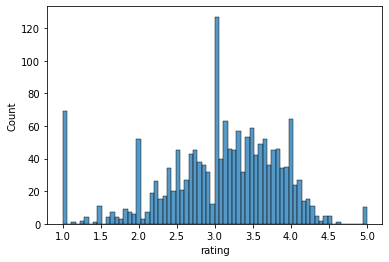

In [51]:
sns.histplot(ratings['rating'], bins=70)

Most of the movies have few ratings